<h1>C964 Capstone Student Performance <h1>

<h4>Importing of Various libraries<h4>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

<h4>The code below loads the CSV file into the program to be used. The file is read and a visual of our data 
    is shown to confirm it loaded properly<h4>

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head(15)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


<h4> Clean data by arranging Race/ethnicity by group number<h4>

In [5]:
df.sort_values(by='race/ethnicity')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
778,female,group A,some college,standard,completed,72,79,82
546,female,group A,some high school,standard,completed,92,100,97
820,female,group A,some high school,standard,completed,85,90,92
741,female,group A,associate's degree,free/reduced,none,37,57,56
305,male,group A,some college,standard,none,69,67,69
...,...,...,...,...,...,...,...,...
297,male,group E,associate's degree,standard,completed,71,74,68
293,female,group E,bachelor's degree,standard,none,65,73,75
289,male,group E,some high school,standard,completed,77,76,77
206,male,group E,bachelor's degree,standard,none,82,62,62


<h4>Our descriptive method showing Data min,max,standard deviation, etc..<h4>

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<h4>Below is data visualization functionalities for data exploration and inspection with Three visualization types <h4>

<h5> We predict that those that have completed a test prep class will have higher marks<h5>

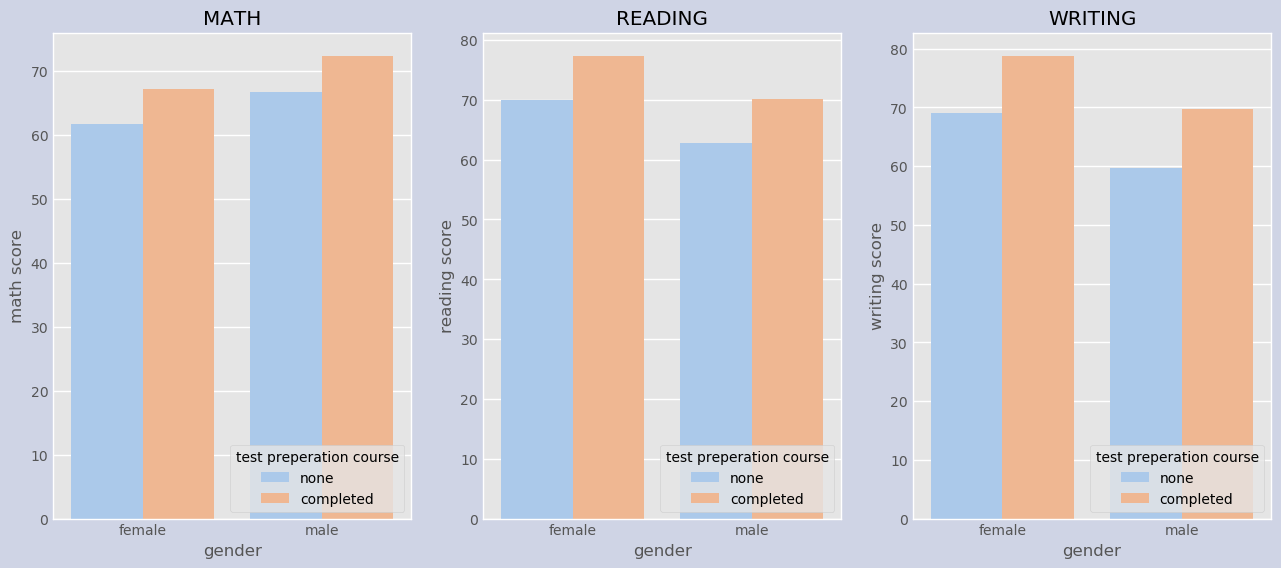

In [29]:
plt.rcParams['figure.facecolor'] = "#cfd4e5"
plt.rcParams['axes.facecolor'] = "#cfd4e5"
plt.figure(figsize=(14,6))
plt.style.use('ggplot')
plt.subplot(1, 3, 3)
sns.barplot(x='gender',y='writing score',data=df,hue='test preparation course',palette='pastel', ci=None)
plt.title('WRITING' ,color='black')
plt.legend(loc='lower right', title='test preperation course')
plt.subplot(1, 3, 2)
sns.barplot(x='gender',y='reading score',data=df,hue='test preparation course',palette='pastel', ci=None)
plt.title('READING' ,color='black')
plt.legend(loc='lower right', title='test preperation course')
plt.subplot(1, 3, 1)
sns.barplot(x='gender',y='math score',data=df,hue='test preparation course',palette='pastel', ci=None)
plt.title('MATH' ,color='black')
plt.legend(loc='lower right', title='test preperation course')
plt.show()

<h4>Second data visualization of parental level of education<h4>

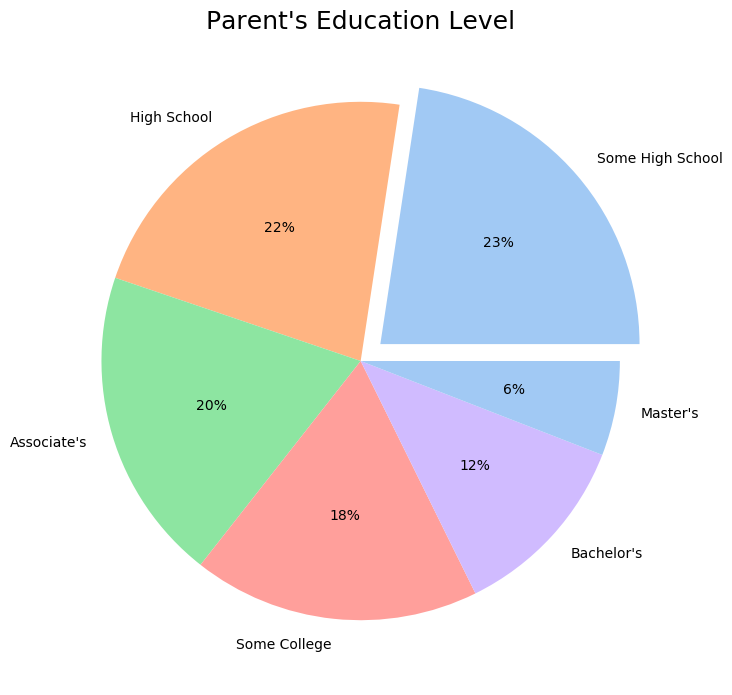

In [28]:
data=df['parental level of education'].value_counts()
plt.style.use('ggplot')
labels=['Some High School', 'High School', 'Associate\'s', 'Some College', 'Bachelor\'s', 'Master\'s']
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(10,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=explode)
plt.title('Parent\'s Education Level' ,fontsize=18 ,color='black')
plt.show()

<h4>Third Data Visualization<h4>

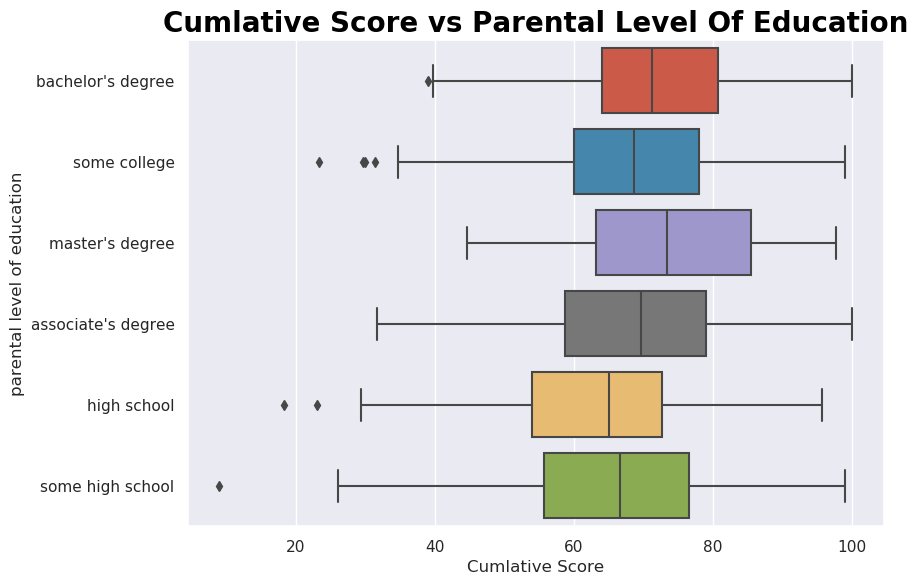

In [33]:
df['Cumlative Score'] = (df['math score']+df['reading score']+df['writing score'])/3
sns.set_style('darkgrid')
sns.set_context("notebook",font_scale=1)
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Cumlative Score', y='parental level of education')
plt.title('Cumlative Score vs Parental Level Of Education',fontsize=20, fontweight='bold', color='black')

plt.show()

In [37]:
def displayDelta(education_level):
    plt.style.use('fivethirtyeight')
    getDelta(education_level).plot(title='Projected Score change', figsize=(12,8))
    plt.xlabel('< Without a Prep Course -- With a Prep Course >')
    plt.legend(loc='lower right')

In [38]:
def getDelta(education_level):
    test1 = df.loc[(df['test preparation course'] == 'none') & (df['parental level of education'] == education_level)]
    dataFrame1 = test1.groupby('parental level of education').mean().round(2)
    test2 = df.loc[(df['test preparation course'] == 'completed') & (df['parental level of education'] == education_level)]
    dataFrame2 = test2.groupby('parental level of education').mean().round(2)
    result = dataFrame1.compare(dataFrame2, align_axis=0).rename(index={'self': 'No Prep', 'other': 'With prep'})
    return result

In [39]:
educationSelection = widgets.Dropdown(options =['some high school', 'high school', 'some college',
                                             "bachelor's degree", "associate's degree", "master's degree"],
                                     value="bachelor's degree", description="Average Parental Education Level",
                                     style=dict(description_width='initial'),  layout=dict(width='350px'))

In [40]:
widgets.interact(getDelta, education_level = educationSelection)
widgets.interact(displayDelta, education_level = educationSelection)

interactive(children=(Dropdown(description='Average Parental Education Level', index=3, layout=Layout(width='3…

interactive(children=(Dropdown(description='Average Parental Education Level', index=3, layout=Layout(width='3…

<function __main__.displayDelta(education_level)>